In [63]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [64]:
password_response, time_response, survey_response = get_responses(2)

## Password Analysis

In [65]:
pd.DataFrame(password_response)

,password2
0,Prolific1!
1,Andrew@1984
2,Kittymeow87!
3,abcd*1234
4,al32QW!
5,A3BDMR7VKG8GRZ
6,1&sak56Uk65i
7,a#p2022
8,z$x5c^
9,ThrowAway12!


## Time Analysis

In [66]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,6.993,12.491,4.413,9.111,40.826,237.705,32.419,15.948,26.032,15.129,49.566,89.285,8.998633
1,46.318,106.015,82.750,102.685,139.155,682.881,17.228,69.660,23.181,34.911,15.373,41.278,22.690583
2,3.326,250.824,4.056,21.511,40.655,601.475,4.378,71.855,7.061,17.096,9.223,44.447,17.931783
3,237.694,35.294,15.412,73.069,219.175,575.454,19.340,41.462,25.565,70.707,10.791,147.173,24.518933
4,3.528,15.487,7.501,58.287,49.736,189.365,9.515,32.629,11.183,26.184,17.894,29.420,7.512150
5,21.608,328.604,21.351,55.241,98.405,374.784,13.626,52.776,32.510,26.592,8.388,48.786,18.044517
6,8.883,18.230,7.841,105.190,61.567,230.206,15.955,84.356,42.324,26.433,13.301,56.075,11.172683
7,2.155,11.030,187.181,7.923,62.628,251.555,3.202,65.490,19.643,11.730,21.410,48.657,11.543400
8,28.601,33.220,11.925,58.187,86.700,247.684,22.508,43.064,12.249,43.323,15.257,58.835,11.025883
9,3.886,43.342,9.708,17.972,85.248,378.270,8.429,26.640,8.190,34.953,9.582,32.803,10.983717


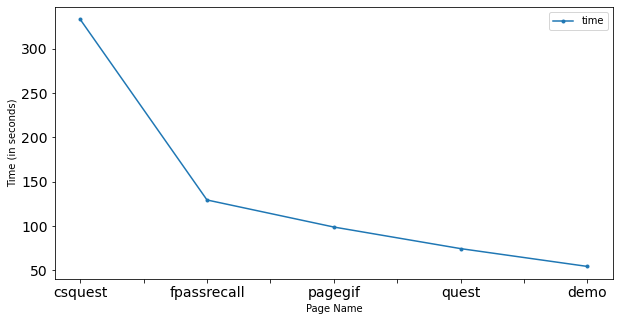

In [67]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [68]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [69]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,mean,median
organized,1.0,7.0,7.0,5.0,6.0,3.0,7.0,4.0,6.0,7.0,...,6.0,6.0,5.0,7.0,6.0,7.0,2.0,6.0,5.523810,6.000000
ordered,1.0,7.0,7.0,6.0,6.0,4.0,7.0,2.0,6.0,6.0,...,6.0,6.0,4.0,1.0,6.0,7.0,2.0,6.0,5.095238,6.000000
beneficial,5.0,7.0,6.0,2.0,7.0,2.0,7.0,2.0,5.0,6.0,...,7.0,6.0,4.0,7.0,7.0,7.0,6.0,6.0,5.476190,6.000000
rewarding,3.0,6.0,6.0,2.0,5.0,2.0,7.0,6.0,4.0,7.0,...,6.0,6.0,5.0,7.0,6.0,7.0,2.0,5.0,5.047619,5.523810
well grouped,1.0,7.0,7.0,5.0,6.0,2.0,7.0,5.0,6.0,7.0,...,7.0,6.0,5.0,7.0,7.0,7.0,1.0,6.0,5.428571,6.000000
structured,1.0,7.0,7.0,5.0,6.0,3.0,7.0,4.0,6.0,6.0,...,6.0,6.0,5.0,7.0,7.0,7.0,2.0,7.0,5.619048,6.000000
helpful,4.0,7.0,7.0,2.0,7.0,3.0,7.0,6.0,5.0,6.0,...,7.0,6.0,6.0,7.0,6.0,7.0,1.0,7.0,5.619048,6.000000
clear,2.0,7.0,7.0,2.0,6.0,4.0,6.0,2.0,7.0,6.0,...,7.0,6.0,6.0,1.0,6.0,7.0,6.0,3.0,5.095238,6.000000
useful,5.0,7.0,6.0,2.0,7.0,2.0,7.0,2.0,5.0,5.0,...,6.0,6.0,5.0,7.0,6.0,7.0,6.0,5.0,5.380952,6.000000
appealing,1.0,6.0,5.0,4.0,7.0,4.0,7.0,5.0,5.0,6.0,...,7.0,6.0,4.0,7.0,7.0,7.0,1.0,5.0,5.238095,5.619048


### CSQuest

In [70]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['8-1', '10-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
8-1,"[Social Media, Financial Websites, Course Mana...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Gaming Websites, Course Managem...",[None of the above],"[Social Media, Gaming Websites, Course Managem...","[Social Media, Gaming Websites]","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email]","[Email, Financial Websites, Government Websites]","[Social Media, Email]",...,"[Social Media, Gaming Websites, E-commerce Web...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Gaming Websites, E-comme...","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Financial Websites]","[Gaming Websites, Content Websites, e.g. Audio...","[Social Media, Email, Gaming Websites, E-comme...","[Financial Websites, E-commerce Websites]",[None of the above],"[Social Media, Email]"
10-1,Thinking about my info being hacked into,The hacker can't hack that system while creati...,I like the part where the hacker can steal the...,just showing the hacker is a good reminder. so...,There is an evil and scary looking character d...,Neither do to be honest but if I'm told to cho...,"Sure, I think it tells an effective story. It...",i create strong password because of some one h...,Seeing the hacker fail when trying to crack Si...,The first few frames of the presented design m...,...,creative ideas and different kinds to make a d...,mostly any time i create the strong password b...,If attack failed they declared that target is ...,because i motivated for this and i create the ...,The parts of the design that motivate me most ...,innovative ideas of design,If give weak password they mentioned attack in...,The design of the password.,"The panels showing ""weak password"" and 'hacked...",the hacker makes me want to make a really stro...
11-1,That if I have an insecure password my identit...,The dartboard represents the difficulty level ...,the dartboard means they were waiting for a ta...,it implies that a stronger password will be ha...,A large dartboard is easy to hit because it is...,It implies that my password could easily be ha...,The dartboard is kind of a metaphor for making...,because it gives safety and encryption,I thing the dartboard implies how easy or how ...,The dartboard implies the people who create an...,...,Dartboard implies to attack initialized. when ...,i trust the design and i save for my data,Dartboard implies when target was unfinished. ...,because i think this interrupt and i think str...,The dartboard in the design could be implying ...,its prevent from hackers and help me to create...,Dartboard implies attack initialized. when hac...,The design of the password.,The dartboard shows the difficulty of hacking ...,the stronger your password is the more inner t...


In [71]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,mean,median
portrayal of hacker stimulates,5.0,7.0,7.0,5.0,6.0,3.0,7.0,4.0,5.0,6.0,...,4.0,6.0,6.0,7.0,4.0,4.0,1.0,6.0,5.190476,5.595238
portrayal of victim encourages,6.0,4.0,7.0,6.0,6.0,3.0,7.0,5.0,5.0,6.0,...,5.0,5.0,5.0,7.0,5.0,6.0,1.0,5.0,5.190476,5.000000
Makes me worried,3.0,7.0,7.0,5.0,7.0,5.0,4.0,5.0,6.0,4.0,...,1.0,5.0,5.0,1.0,2.0,2.0,1.0,2.0,3.952381,4.000000
Encourages me to create a strong password,3.0,7.0,7.0,6.0,7.0,2.0,7.0,4.0,6.0,7.0,...,6.0,6.0,7.0,7.0,6.0,6.0,1.0,6.0,5.571429,6.000000
Makes me feel emotionally connected to the presented scenario,1.0,7.0,5.0,2.0,5.0,1.0,4.0,3.0,5.0,1.0,...,4.0,5.0,6.0,7.0,2.0,6.0,1.0,7.0,4.047619,4.023810
Makes me feel personally connected to the presented scenario,1.0,7.0,5.0,2.0,6.0,1.0,4.0,4.0,5.0,1.0,...,5.0,4.0,5.0,7.0,4.0,6.0,1.0,6.0,4.238095,4.619048
easy to follow,2.0,7.0,7.0,5.0,6.0,5.0,7.0,6.0,6.0,6.0,...,6.0,6.0,5.0,7.0,5.0,6.0,2.0,6.0,5.523810,6.000000
Novel,5.0,6.0,5.0,6.0,7.0,7.0,7.0,5.0,2.0,6.0,...,6.0,4.0,6.0,7.0,4.0,7.0,2.0,3.0,5.190476,5.595238
Attractive,2.0,7.0,7.0,2.0,6.0,4.0,6.0,2.0,7.0,6.0,...,7.0,6.0,6.0,1.0,6.0,7.0,6.0,3.0,5.095238,6.000000
Informative,4.0,7.0,5.0,2.0,6.0,1.0,7.0,6.0,7.0,6.0,...,6.0,6.0,6.0,7.0,5.0,7.0,1.0,6.0,5.285714,6.000000


### First Password Survey

In [72]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,mean,median
"I do not change my passwords, unless I have to.",7,5,6,5,5,7,1,6,6,6,...,5,5,5,1,5,7,4,7,5.238095,5.119048
I use different passwords for different online accounts that I have.,2,7,7,6,3,7,7,5,5,3,...,4,4,6,7,6,2,7,5,5.142857,5.071429
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",1,7,1,3,5,7,7,4,1,5,...,6,5,6,7,5,4,7,6,4.857143,5.000000
I do not include special characters in my password if it’s not required.,1,3,7,5,3,1,1,6,7,5,...,1,6,3,1,2,4,2,2,3.380952,3.000000


### Second Password Survey

In [73]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,mean,median
strength of password,6,7,5,1,3,6,7,6,5,6,...,7,6,5,7,7,7,7,6,5.904762,6.000000
motivated after going through design,5,7,7,3,5,6,7,5,5,7,...,5,6,6,7,5,7,1,7,5.714286,6.000000
Hard to remember,1,1,3,1,6,7,7,6,6,5,...,2,5,4,1,2,3,4,2,3.761905,3.880952
Can be easily guessed by a hacker,2,1,1,6,4,2,1,6,3,3,...,1,6,5,7,1,2,1,4,3.095238,3.000000
Can be easily guessed by my close friends or family members,1,2,2,2,3,1,1,5,1,3,...,3,5,3,7,2,3,1,4,2.761905,2.380952
Stronger than the passwords I usually use,3,6,7,1,3,7,4,4,5,7,...,6,6,6,7,6,2,3,6,4.952381,5.500000


### Demographics

In [74]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

demo = demo.rename(new_index).transpose()
demo


,What is your gender?,What is your age range?,What is your race?,What is your highest achieved education level?,What is the primary field of your education?,Which of the following best describes your primary occupation?,Which of the following best describes your experience in computer and technology related fields?,Which of the following best describes your experience in cybersecurity?
0,Man,25-29 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree
1,Man,35-39 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Hold or held a work position,Formal training
2,Woman,30-34 years old,[White],High School Graduate,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught
3,Woman,35-39 years old,[White],High School Graduate,no college,hotel management,No experience,No experience
4,Man,30-34 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Self-taught,Self-taught
5,Man,40-44 years old,[Black or African American],Two-year College Degree,"Law, and Public Administration",business owner,Self-taught,No experience
6,Man,45-49 years old,[White],Four-year College Degree,Business,Business or industry,No experience,No experience
7,Man,35-39 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Non-profit organization,Pursuing or completed a degree,Formal training
8,Man,35-39 years old,[Hispanic or Latino],High School Graduate,Aviation,Business or industry,Self-taught,No experience
9,Man,30-34 years old,[White],Two-year College Degree,"Medicine, Nursing, and Health Sciences",Non-profit organization,Self-taught,Formal training
